In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Training Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
print("Features Null Values")
df.isnull().sum()

Features Null Values


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})

df['Education'] = df['Education'].replace({'Graduate':1,'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes':1,'No':0})

df['Property_Area'] = df['Property_Area'].replace({'Urban':1,'Rural':0,'Semiurban':2})

In [6]:
df['Dependents'] = df['Dependents'].astype(str)
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [7]:
df['Dependents'] = df['Dependents'].astype(str)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(7), int32(2), int64(3), object(1)
memory usage: 57.7+ KB


In [11]:
df.drop(columns='Loan_ID',axis=1,inplace=True)

In [12]:
def show(x):
    sns.catplot(data=df, x=x,hue='Loan_Status' ,kind="count")
    plt.show()
def plot(x):
    sns.displot(data=df, x=x,hue='Loan_Status' ,kind="kde")
    plt.show()

In [13]:
features=df.columns
features

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

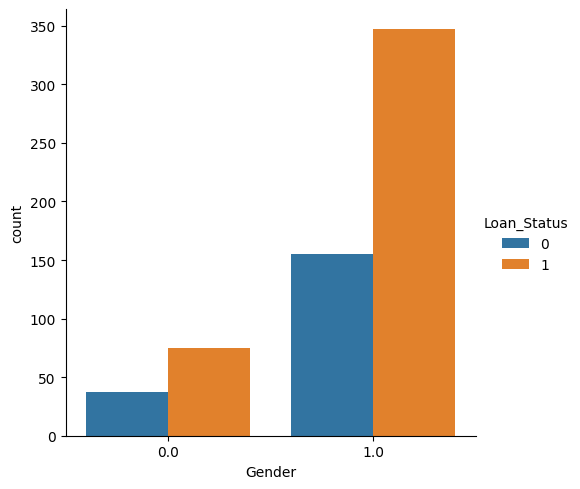

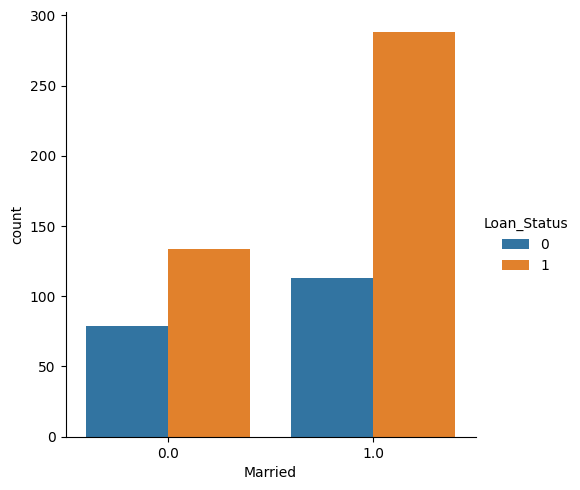

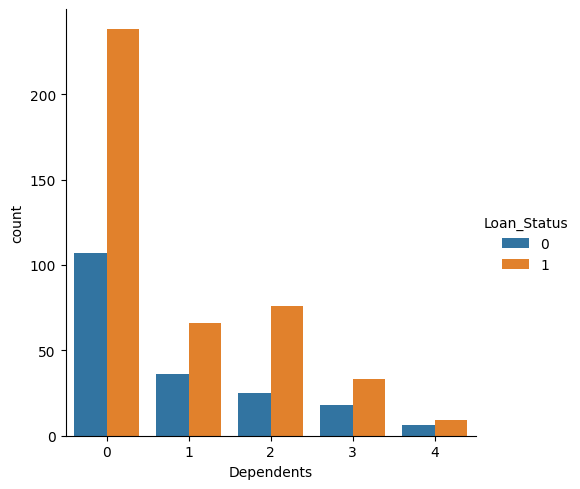

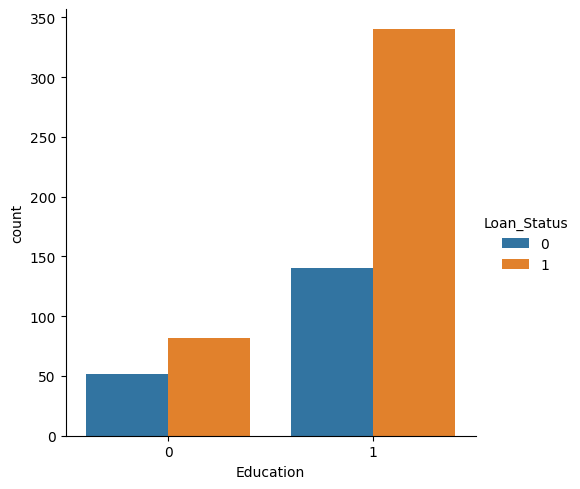

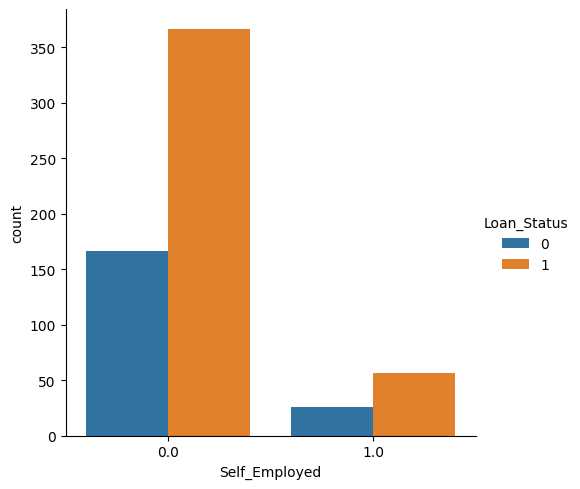

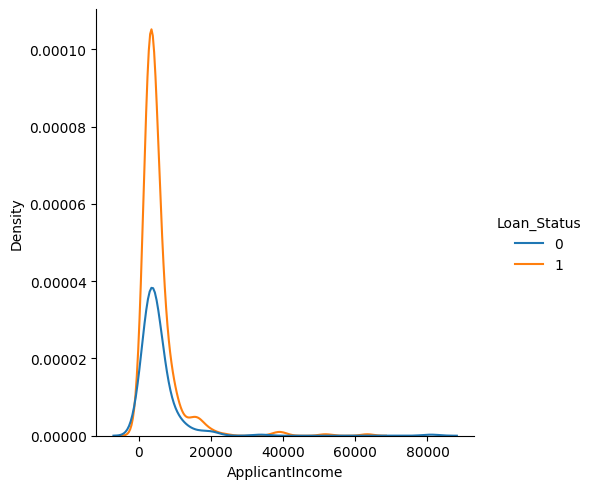

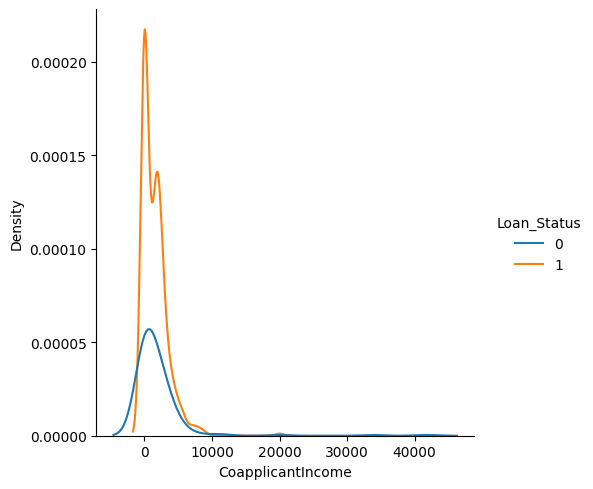

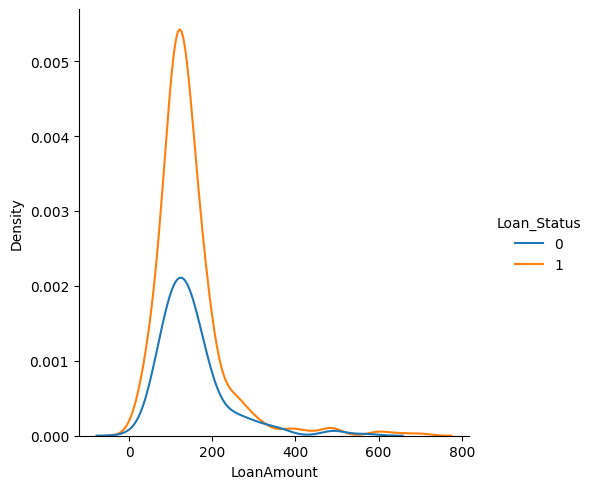

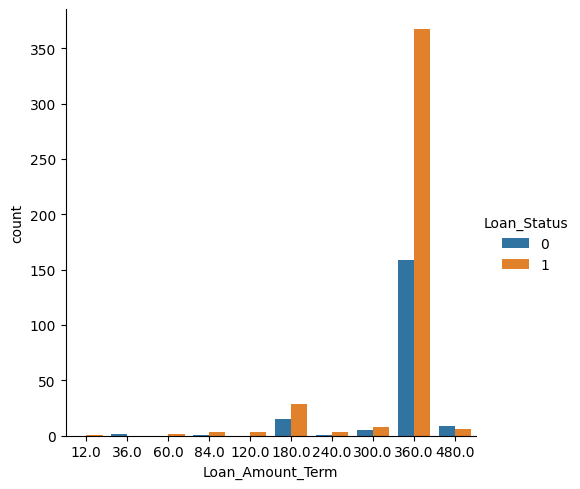

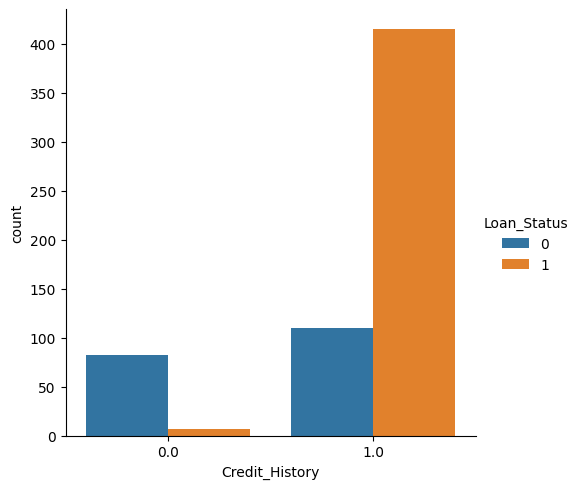

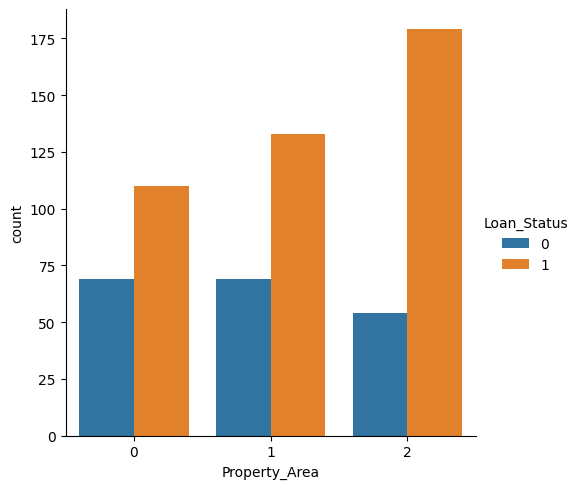

In [14]:
for i in range(len(features)-1):
    if features[i]=='LoanAmount' or features[i]=='ApplicantIncome' or features[i]=='CoapplicantIncome':
        plot(features[i])
    else:
        show(features[i])

In [15]:
y=df['Loan_Status']
x=df
x.drop(columns='Loan_Status',inplace=True)

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y ,test_size=0.3,random_state=123)

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(xtrain, ytrain)


RandomForestClassifier(max_depth=10, random_state=0)

In [18]:
from sklearn.metrics import accuracy_score
ypred=clf.predict(xtest)
print("Accuracy is : ",accuracy_score(ypred,ytest))

Accuracy is :  0.772972972972973


In [19]:
from sklearn.ensemble import ExtraTreesClassifier
etx=ExtraTreesClassifier()
etx.fit(xtrain,ytrain)

ExtraTreesClassifier()

In [20]:
epred=etx.predict(xtest)
print("Accuracy using Extra tree is : ",accuracy_score(epred,ytest))

Accuracy using Extra tree is :  0.7351351351351352


In [21]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=1)
tree.fit(xtrain,ytrain)
treepred=tree.predict(xtest)
print("Accuracy Using Decision Tree is : ",accuracy_score(treepred,ytest))

Accuracy Using Decision Tree is :  0.6756756756756757


# Train Model Using Neural Network

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.fit_transform(xtest)

In [23]:
ytrain.shape

(429,)

In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model=Sequential()

In [26]:
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(7,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 7)                 84        
                                                                 
 dense_2 (Dense)             (None, 3)                 24        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 244 (976.00 Byte)
Trainable params: 244 (976.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [28]:
history=model.fit(xtrain_scaled,ytrain,epochs=100,validation_split=0.2)

Epoch 1/100


e:\newpy\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


11/11 [==============================] - 1s 19ms/step - loss: 0.6804 - accuracy: 0.6589 - val_loss: 0.7036 - val_accuracy: 0.7674
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6739 - accuracy: 0.6851 - val_loss: 0.6970 - val_accuracy: 0.7674
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6678 - accuracy: 0.6851 - val_loss: 0.6903 - val_accuracy: 0.7674
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6617 - accuracy: 0.6851 - val_loss: 0.6828 - val_accuracy: 0.7674
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.6851 - val_loss: 0.6747 - val_accuracy: 0.7674
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6486 - accuracy: 0.6851 - val_loss: 0.6658 - val_accuracy: 0.7674
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6408 - accuracy: 0.6851 - val_loss: 0.6547 - val_accuracy: 0.7674
Epoch 8/100
11/11 [=====

In [29]:
model.layers[0].get_weights()

[array([[ 0.0883138 , -0.4365447 , -0.15662177, -0.14019483, -0.22815903,
          0.6330064 , -0.34487858,  0.2806635 , -0.35429674, -0.15699801,
         -0.20501064],
        [-0.3012986 ,  0.10470033,  0.20640884, -0.05670689, -0.05650804,
          0.56412154,  0.23844862, -0.20641366, -0.08866234,  0.33673826,
         -0.41516706],
        [-0.4382377 , -0.06232896,  0.06646263, -0.13918336, -0.21132939,
         -0.18683982, -0.02015363, -0.01925265, -0.03028503,  0.17123322,
         -0.44830742],
        [ 0.05493416, -0.20389184, -0.32923266,  0.2945257 , -0.12062643,
         -0.18690114, -0.18669009, -0.01935655, -0.14898427,  0.10461332,
         -0.29165748],
        [ 0.01774057, -0.5491121 , -0.08010497, -0.33536282, -0.01610588,
          0.4509306 ,  0.49238065, -0.23046651,  0.25852725, -0.75743496,
         -0.22312917],
        [-0.5705648 , -0.13444157, -0.10187449, -0.46374542,  0.01491483,
         -0.04297113, -0.6978027 ,  0.15762897,  0.11367377,  0.0743486

In [30]:
y_log=model.predict(xtest_scaled)
pred=np.where(y_log>0.5,1,0)

6/6 [==============================] - 0s 3ms/step


In [31]:
accuracy_score(ytest,pred)

0.745945945945946

In [32]:
history.history

{'loss': [0.6803748607635498,
  0.6738744974136353,
  0.6677676439285278,
  0.6617465615272522,
  0.6548900008201599,
  0.6485758423805237,
  0.6408161520957947,
  0.6322060823440552,
  0.6235235929489136,
  0.6146042943000793,
  0.6053630709648132,
  0.597540557384491,
  0.5897666811943054,
  0.5824657678604126,
  0.5772569179534912,
  0.5723046660423279,
  0.567715585231781,
  0.5641010999679565,
  0.5608329176902771,
  0.557331383228302,
  0.5542385578155518,
  0.5508193373680115,
  0.5480700135231018,
  0.5453478097915649,
  0.5426345467567444,
  0.5402557253837585,
  0.5382259488105774,
  0.5362581610679626,
  0.5339937210083008,
  0.531920313835144,
  0.5299897789955139,
  0.527651846408844,
  0.5264177918434143,
  0.5244207978248596,
  0.5227859616279602,
  0.5209575891494751,
  0.5190573930740356,
  0.5176129341125488,
  0.5153219699859619,
  0.5138890147209167,
  0.5126055479049683,
  0.5108471512794495,
  0.5093289613723755,
  0.5075645446777344,
  0.5059473514556885,
  0.504

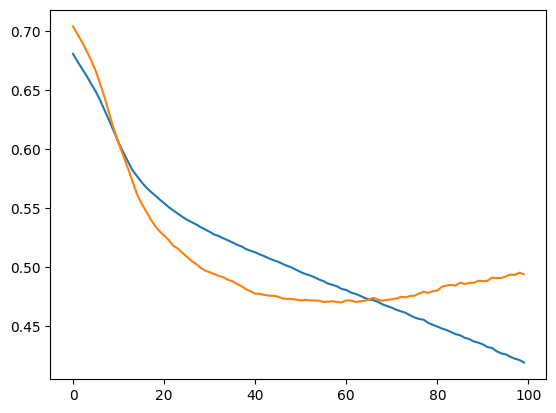

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

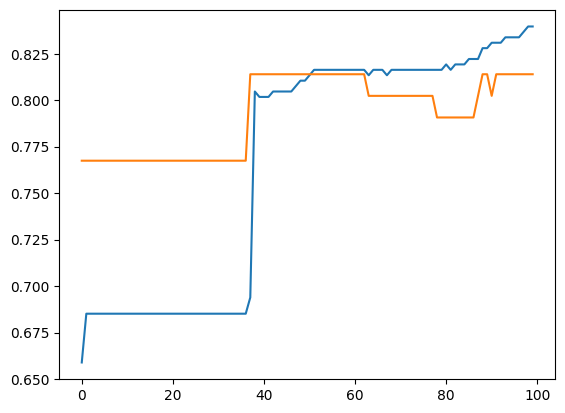

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])